<ipython-input-16-81183c42e424>:24: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
<ipython-input-16-81183c42e424>:25: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
<ipython-input-16-81183c42e424>:32: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(b[sort_ind], Color='k', LineWidth=2, label='Housing Value') # True relationship
<ipython-input-16-81183c42e424>:33: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, Marker

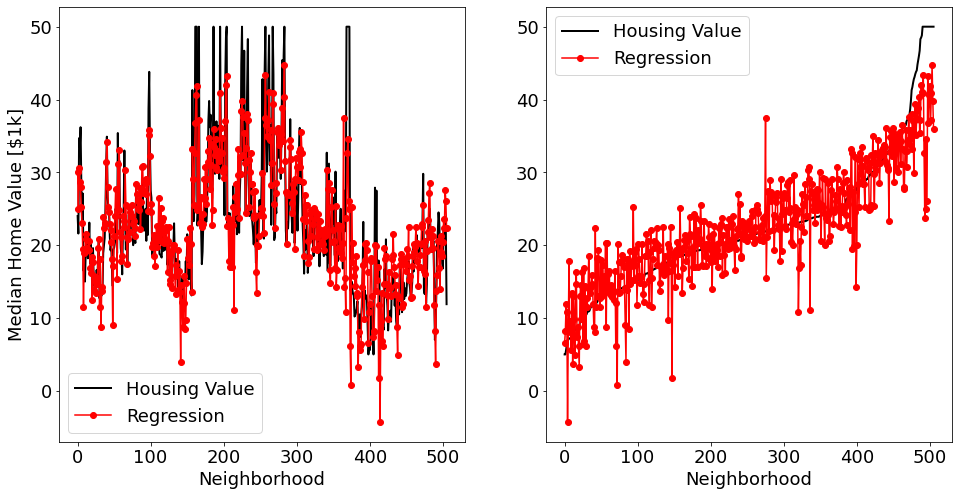

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]
plt.rcParams.update({'font.size': 18})

# Load dataset
H = np.loadtxt(os.path.join('..','DATA','housing.data'))
b = H[:,-1] # housing values in $1000s
A = H[:,:-1] # other factors

# Pad with ones for nonzero offset
A = np.pad(A,[(0,0),(0,1)],mode='constant',constant_values=1)


# Solve Ax=b using SVD
# Note that the book uses the Matlab-specific "regress" command
U, S, VT = np.linalg.svd(A,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b

fig = plt.figure()
ax1 = fig.add_subplot(121)

plt.plot(b, Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.ylabel('Median Home Value [$1k]')
plt.legend()

ax2 = fig.add_subplot(122)
sort_ind = np.argsort(H[:,-1])
plt.plot(b[sort_ind], Color='k', LineWidth=2, label='Housing Value') # True relationship
plt.plot(A[sort_ind,:]@x, '-o', Color='r', LineWidth=1.5, MarkerSize=6, label='Regression')
plt.xlabel('Neighborhood')
plt.legend()

plt.show()

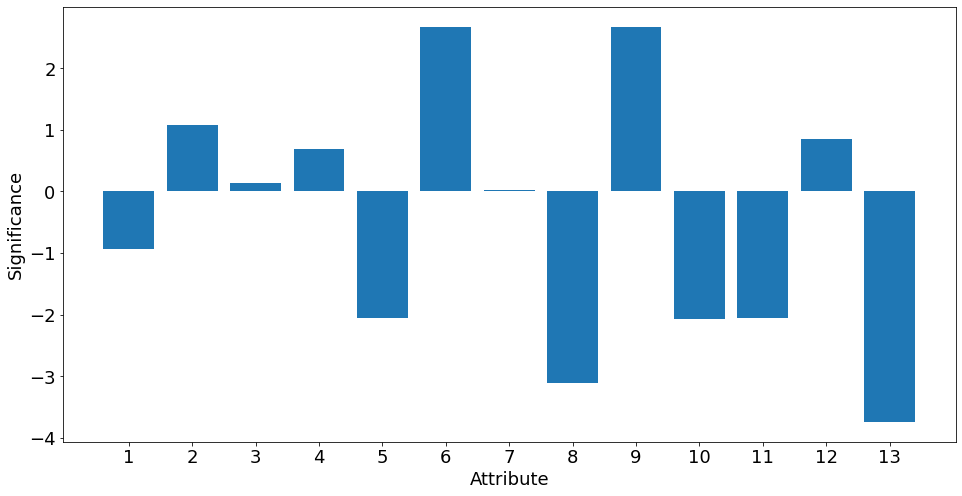

In [15]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
    
A2[:,-1] = np.ones(A.shape[0])

U, S, VT = np.linalg.svd(A2,full_matrices=0)
x = VT.T @ np.linalg.inv(np.diag(S)) @ U.T @ b
x_tick = range(len(x)-1)+np.ones(len(x)-1)
plt.bar(x_tick,x[:-1])
plt.xlabel('Attribute')
plt.ylabel('Significance')
plt.xticks(x_tick)
plt.show()


In [14]:
A_mean = np.mean(A,axis=0)
A_mean = A_mean.reshape(-1, 1)

A2 = A - np.ones((A.shape[0],1)) @ A_mean.T

for j in range(A.shape[1]-1):
    A2std = np.std(A2[:,j])
    A2[:,j] = A2[:,j]/A2std
A2

array([[-0.41978194,  0.28482986, -1.2879095 , ...,  0.44105193,
        -1.0755623 ,  0.        ],
       [-0.41733926, -0.48772236, -0.59338101, ...,  0.44105193,
        -0.49243937,  0.        ],
       [-0.41734159, -0.48772236, -0.59338101, ...,  0.39642699,
        -1.2087274 ,  0.        ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.98304761,  0.        ],
       [-0.40776407, -0.48772236,  0.11573841, ...,  0.4032249 ,
        -0.86530163,  0.        ],
       [-0.41500016, -0.48772236,  0.11573841, ...,  0.44105193,
        -0.66905833,  0.        ]])

In [3]:
A_mean

array([3.61352356e+00, 1.13636364e+01, 1.11367787e+01, 6.91699605e-02,
       5.54695059e-01, 6.28463439e+00, 6.85749012e+01, 3.79504269e+00,
       9.54940711e+00, 4.08237154e+02, 1.84555336e+01, 3.56674032e+02,
       1.26530632e+01, 1.00000000e+00])

In [9]:
A_mean = A_mean.reshape(-1, 1)
A_mean.shape

(14, 1)

In [21]:
(U.T @ U)

array([[ 1.00000000e+00, -2.22044605e-16, -5.68989300e-16,
        -1.94289029e-16, -1.38777878e-17,  1.38777878e-17,
        -7.63278329e-17,  2.77555756e-17, -4.85722573e-17,
         2.77555756e-17, -4.85722573e-17, -1.56125113e-17,
         3.64291930e-17,  6.93889390e-18],
       [-2.22044605e-16,  1.00000000e+00, -1.73472348e-16,
        -1.89952221e-16,  3.67761377e-16,  1.38777878e-16,
         1.24900090e-16, -1.94289029e-16, -1.66533454e-16,
         6.59194921e-17, -3.46944695e-17, -2.08166817e-17,
         1.38777878e-17, -4.16333634e-17],
       [-5.68989300e-16, -1.73472348e-16,  1.00000000e+00,
         4.85722573e-17, -1.52655666e-16,  2.08166817e-16,
        -4.85722573e-17,  9.19403442e-17,  7.63278329e-17,
         2.77555756e-17, -7.63278329e-17, -1.24900090e-16,
        -6.93889390e-18, -1.38777878e-17],
       [-1.94289029e-16, -1.89952221e-16,  4.85722573e-17,
         1.00000000e+00, -9.71445147e-17,  2.75821033e-16,
         1.38777878e-17,  6.93889390e-17,  0.

In [22]:
a = np.array([[1,0],[0,1],[0,0]])

In [24]:
a@a.T

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [25]:
a.T@a

array([[1, 0],
       [0, 1]])